In [40]:
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [41]:
df = pd.read_csv('data/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In this example, we'll return to our Automobile dataset and apply PCA, using it as a descriptive technique to discover features. We'll look at other use-cases in the exercise.

In [42]:
automobile_path = kagglehub.dataset_download("toramky/automobile-dataset")
print(automobile_path)

/Users/unrealre/.cache/kagglehub/datasets/toramky/automobile-dataset/versions/2


In [43]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = pd.read_csv(os.path.join(automobile_path, "Automobile_data.csv"))
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


We've selected four features that cover a range of properties. Each of these features also has a high MI score with the target, price. We'll standardize the data since these features aren't naturally on the same scale.

In [44]:
features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]
df[features].head()


,highway-mpg,engine-size,horsepower,curb-weight
0,27,130,111,2548
1,27,130,111,2548
2,26,152,154,2823
3,30,109,102,2337
4,22,136,115,2824


In [45]:
for col in features:
    # Сначала очистка, если нужна
    # df[col] = df[col].str.replace(',', '.', regex=False)
    # df[col] = df[col].replace({'some_str': np.nan}, regex=False) # Замена строк на NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled.dropna(inplace=True)

In [46]:
X_scaled.head()

,highway-mpg,engine-size,horsepower,curb-weight
0,-0.544725,0.074267,0.169809,-0.014531
1,-0.544725,0.074267,0.169809,-0.014531
2,-0.689938,0.602571,1.252540,0.513625
3,-0.109087,-0.430023,-0.056810,-0.419770
4,-1.270789,0.218350,0.270528,0.515545


Now we can fit scikit-learn's PCA estimator and create the principal components. You can see here the first few rows of the transformed dataset.

In [47]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.79883896e-01, -3.70245822e-01,  8.98072740e-02,
         2.04062037e-01],
       [ 3.79883896e-01, -3.70245822e-01,  8.98072740e-02,
         2.04062037e-01],
       [ 1.52587311e+00, -6.86100729e-02,  5.63622231e-01,
        -1.46182792e-01],
       [-4.06077368e-01, -3.92381910e-01,  2.31338769e-01,
         5.77480142e-02],
       [ 1.12738942e+00, -7.91013917e-01, -2.30846920e-01,
         2.24665253e-01],
       [ 5.40922239e-01, -5.13146909e-01,  8.49083579e-02,
         4.60115551e-01],
       [ 8.72148653e-01, -4.54251874e-01, -3.14718118e-01,
         7.79818470e-02],
       [ 9.80264099e-01, -4.35027975e-01, -4.45159995e-01,
        -4.67502226e-02],
       [ 1.77960067e+00, -1.02438461e+00, -6.90244849e-02,
        -2.67470845e-01],
       [ 1.85659959e+00, -7.88519043e-01,  3.87986834e-01,
        -5.34963252e-01],
       [-3.02961125e-01, -5.10567199e-01,  1.31698952e-01,
         4.44444068e-02],
       [-3.02961125e-01, -5.10567199e-01,  1.31698952e-01,
      

In [48]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.379884,-0.370246,0.089807,0.204062
1,0.379884,-0.370246,0.089807,0.204062
2,1.525873,-0.068610,0.563622,-0.146183
3,-0.406077,-0.392382,0.231339,0.057748
4,1.127389,-0.791014,-0.230847,0.224665


In [49]:
pca.components_

array([[-0.48704809,  0.50268896,  0.49818664,  0.51175975],
       [ 0.77457723,  0.62502277,  0.03311307,  0.09099549],
       [ 0.08719259, -0.05946162,  0.77950527, -0.61744093],
       [-0.39396919,  0.59423452, -0.37826597, -0.59041381]])

In [50]:
pca.explained_variance_ratio_

array([0.83256474, 0.08191055, 0.06289375, 0.02263097])

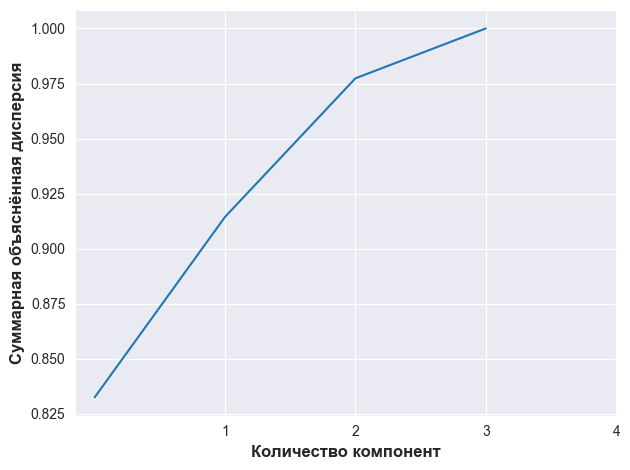

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_)+1))  # чтобы x был 1, 2, 3, 4
plt.grid(True)
plt.show()

After fitting, the PCA instance contains the loadings in its components_ attribute. (Terminology for PCA is inconsistent, unfortunately. We're following the convention that calls the transformed columns in X_pca the components, which otherwise don't have a name.) We'll wrap the loadings up in a dataframe.

In [52]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.487048,0.774577,0.087193,-0.393969
engine-size,0.502689,0.625023,-0.059462,0.594235
horsepower,0.498187,0.033113,0.779505,-0.378266
curb-weight,0.511760,0.090995,-0.617441,-0.590414


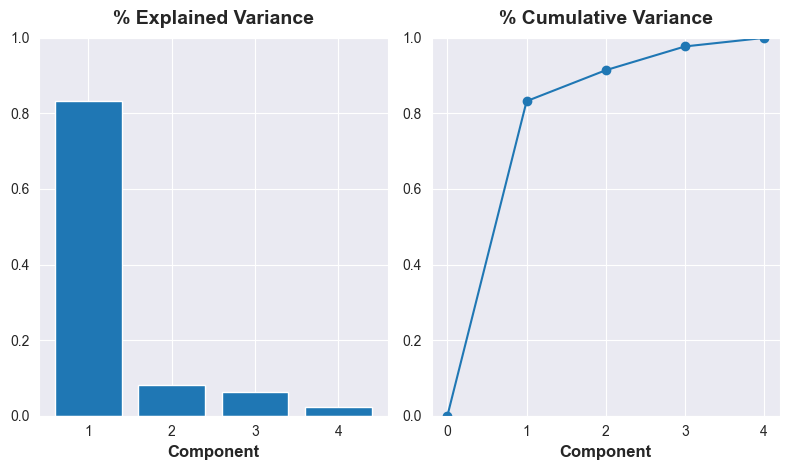

In [53]:
# Look at explained variance
plot_variance(pca);

In [54]:
X_pca.head()

,PC1,PC2,PC3,PC4
0,0.379884,-0.370246,0.089807,0.204062
1,0.379884,-0.370246,0.089807,0.204062
2,1.525873,-0.068610,0.563622,-0.146183
3,-0.406077,-0.392382,0.231339,0.057748
4,1.127389,-0.791014,-0.230847,0.224665


The third component shows a contrast between horsepower and curb_weight -- sports cars vs. wagons, it seems.

In [63]:
X_pca["PC3"].sort_values(ascending=False)

129    2.502338
126    1.610713
127    1.610713
128    1.558536
105    1.012383
         ...   
68    -1.201035
70    -1.224752
110   -1.326881
114   -1.392102
153   -1.420826
Name: PC3, Length: 203, dtype: float64

In [58]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body-style", "horsepower", "curb-weight"]
df.loc[idx, cols]

,make,body-style,horsepower,curb-weight
129,porsche,hatchback,288.0,3366
126,porsche,hardtop,207.0,2756
127,porsche,hardtop,207.0,2756
128,porsche,convertible,207.0,2800
105,nissan,hatchback,200.0,3139
...,...,...,...,...
68,mercedes-benz,wagon,123.0,3750
70,mercedes-benz,sedan,123.0,3770
110,peugot,wagon,95.0,3430
114,peugot,wagon,95.0,3485
